## This notebook is mainly used on the capstone project of IBM Data Science Certificate.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
df = pd.read_csv(r'C:\Users\Shunan\Documents\DS_ibm\final_project\Data-Collisions.csv')

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
# Drop id or code columns
df1 = df.drop(columns=['OBJECTID', 'INCKEY', 'COLDETKEY','INTKEY', 'REPORTNO', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)
df1.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,2,...,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,-122.347294,47.647172,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,2,...,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,-122.334540,47.607871,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,4,...,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,-122.334803,47.604803,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,3,...,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,-122.306426,47.545739,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,2,...,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [9]:
# We check if 'SEVERITYCODE' and 'SEVERITYCODE.1' are distinct, then drop one of them if the answer is positive; we will also drop the correspond severity description and the detailed address('LOCATION')
comparison = pd.Series(df1['SEVERITYCODE'] == df1['SEVERITYCODE.1'])
comparison.value_counts()

True    194673
dtype: int64

In [10]:
df1 = df1.drop(columns=['SEVERITYCODE.1', 'SEVERITYDESC', 'LOCATION'], axis=1)
df1.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,...,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,...,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,...,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,...,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,...,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [11]:
# check missing values
df1.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
STATUS                 0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

In [12]:
# drop 3 columns
df1 = df1.drop(columns=['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'], axis=1)
df1.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [13]:
# replace other missing values
values = {'X':df1['X'].median(), 'Y':df1['Y'].median(), 'ADDRTYPE':df1['ADDRTYPE'].mode().iloc[0], 'COLLISIONTYPE':df1['COLLISIONTYPE'].mode().iloc[0], 'JUNCTIONTYPE':df1['JUNCTIONTYPE'].mode().iloc[0], 'UNDERINFL':df1['UNDERINFL'].mode().iloc[0], 'WEATHER':df1['WEATHER'].mode().iloc[0], 'ROADCOND':df1['ROADCOND'].mode().iloc[0], 'LIGHTCOND':df1['LIGHTCOND'].mode().iloc[0]}
df1 = df1.fillna(value=values, axis=0)
df1.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
STATUS           0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

In [14]:
# Drop date column
df1.drop(columns='INCDATE', axis=1, inplace=True)

In [15]:
# Convert DTTM
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'])
df1.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Matched,Block,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Matched,Block,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Matched,Block,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Matched,Intersection,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [18]:
df1 = df1.reset_index(drop=True)

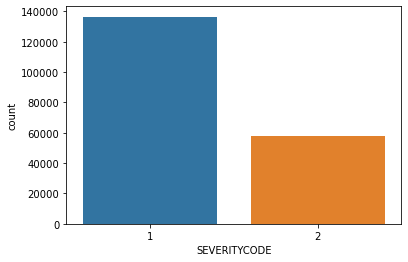

In [19]:
sns.countplot(df1['SEVERITYCODE'], data=df1)

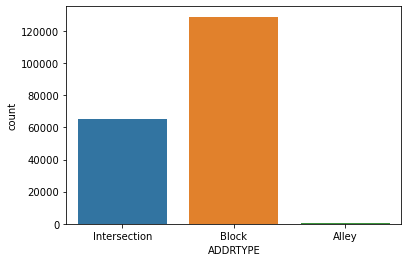

In [20]:
sns.countplot(df1['ADDRTYPE'], data=df1)

[Text(0, 0, 'Overcast'),
 Text(0, 0, 'Raining'),
 Text(0, 0, 'Clear'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Snowing'),
 Text(0, 0, 'Fog/Smog/Smoke'),
 Text(0, 0, 'Sleet/Hail/Freezing Rain'),
 Text(0, 0, 'Blowing Sand/Dirt'),
 Text(0, 0, 'Severe Crosswind'),
 Text(0, 0, 'Partly Cloudy')]

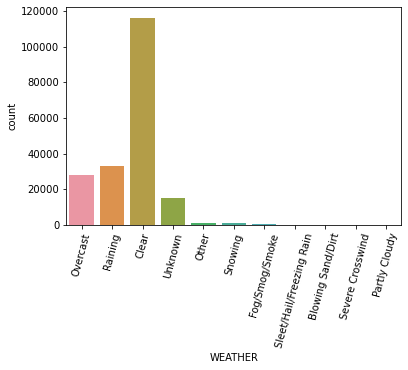

In [21]:
ax = sns.countplot(x = df1['WEATHER'], data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

[Text(0, 0, 'Wet'),
 Text(0, 0, 'Dry'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Snow/Slush'),
 Text(0, 0, 'Ice'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Sand/Mud/Dirt'),
 Text(0, 0, 'Standing Water'),
 Text(0, 0, 'Oil')]

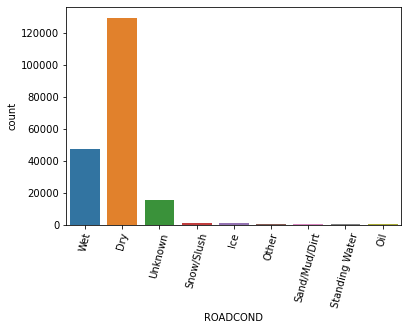

In [22]:
ax1 = sns.countplot(x = df1['ROADCOND'], data=df1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

[Text(0, 0, 'Daylight'),
 Text(0, 0, 'Dark - Street Lights On'),
 Text(0, 0, 'Dark - No Street Lights'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Dusk'),
 Text(0, 0, 'Dawn'),
 Text(0, 0, 'Dark - Street Lights Off'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Dark - Unknown Lighting')]

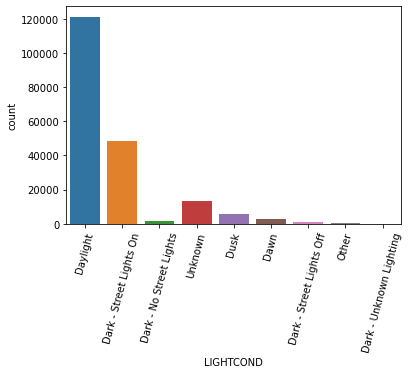

In [23]:
ax2 = sns.countplot(x = df1['LIGHTCOND'], data=df1)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=75)

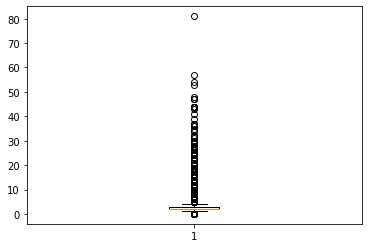

In [24]:
plt.boxplot(x='PERSONCOUNT', data=df1)
plt.show()

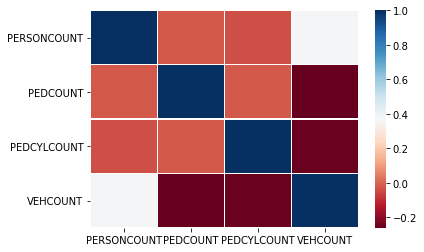

In [25]:
sns.heatmap(df1[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].corr(), cmap='RdBu', linewidth=0.3)

In [26]:
df1['WEATHER'].value_counts()

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [27]:
df1['ROADCOND'].value_counts()

Dry               129522
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [28]:
df1['LIGHTCOND'].value_counts()

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [29]:
y = df1['SEVERITYCODE']
X = df1.drop(['SEVERITYCODE','X','Y','INCDTTM'], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(X['STATUS'])
X['STATUS'] = le.transform(X['STATUS'])

In [31]:
add = LabelEncoder().fit(X['ADDRTYPE'])
X['ADDRTYPE'] = add.transform(X['ADDRTYPE'])

In [32]:
col = LabelEncoder().fit(X['COLLISIONTYPE'])
X['COLLISIONTYPE'] = col.transform(X['COLLISIONTYPE'])

In [33]:
we = LabelEncoder().fit(X['WEATHER'])
X['WEATHER'] = we.transform(X['WEATHER'])

In [34]:
rc = LabelEncoder().fit(X['ROADCOND'])
X['ROADCOND'] = rc.transform(X['ROADCOND'])

In [35]:
lc = LabelEncoder().fit(X['LIGHTCOND'])
X['LIGHTCOND'] = lc.transform(X['LIGHTCOND'])

In [36]:
jt = LabelEncoder().fit(X['JUNCTIONTYPE'])
X['JUNCTIONTYPE'] = jt.transform(X['JUNCTIONTYPE'])

In [37]:
X['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [38]:
hpc = LabelEncoder().fit(X['HITPARKEDCAR'])
X['HITPARKEDCAR'] = hpc.transform(X['HITPARKEDCAR'])

In [39]:
X['UNDERINFL'].value_counts()

N    105158
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [40]:
X['UNDERINFL'].replace('N', 0, inplace=True)

In [41]:
X['UNDERINFL'].replace('Y', 1, inplace=True)

In [42]:
X.head()

,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,0,2,0,2,0,0,2,1,0,4,8,5,0
1,0,1,9,2,0,0,2,4,0,6,8,2,0
2,0,1,5,4,0,0,3,4,0,4,0,5,0
3,0,1,4,3,0,0,3,4,0,1,0,5,0
4,0,2,0,2,0,0,2,1,0,6,8,5,0


In [43]:
y.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [44]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.16046824,  1.39942178, -1.64247496, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783, -1.28460737, -0.2217116 ,  0.34206956,
         1.50722693,  0.34496947, -0.19619929],
       [-0.16046824, -0.69049979,  1.63045406, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783,  0.90108032, -0.2217116 ,  1.04697121,
         1.50722693, -1.42641774, -0.19619929],
       [-0.16046824, -0.69049979,  0.17581894,  1.15576451, -0.18743029,
        -0.16958841,  1.7102107 ,  0.90108032, -0.2217116 ,  0.34206956,
        -0.69828325,  0.34496947, -0.19619929],
       [-0.16046824, -0.69049979, -0.18783984,  0.41278122, -0.18743029,
        -0.16958841,  1.7102107 ,  0.90108032, -0.2217116 , -0.71528292,
        -0.69828325,  0.34496947, -0.19619929],
       [-0.16046824,  1.39942178, -1.64247496, -0.33020207, -0.18743029,
        -0.16958841,  0.12553783, -1.28460737, -0.2217116 ,  1.04697121,
         1.50722693,  0.34496947, -0.19619929]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [46]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\shunan\anaconda3\lib\site-packages (0.7.0)


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
over_samples = SMOTE(random_state=0)
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train.values.reshape(-1,1))


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [50]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(over_samples_X, over_samples_y)
y_pred_knn = knn.predict(X_test)
y_pred_knn[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(over_samples_y, knn.predict(over_samples_X)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_knn))

Train set Accuracy:  0.6934465308853666
Test set Accuracy:  0.7213280367110715


In [ ]:
# I would like to run different models but my computer took a lot of time running them, sometimes it just stuck. So I will only use KNN as an example.